In [1]:
%matplotlib inline

import pandas as pd
import networkx as nx

import warnings
from operator import itemgetter
from networkx.algorithms import community

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("sparqldata.csv")
df

,nama_dpr,nama_partai,nama_provinsi
0,Anis_Matta,Partai_Keadilan_Sejahtera,Sulawesi_Selatan
1,Nizar_Dahlan,Partai_Bulan_Bintang,Bengkulu
2,Hidayat_Nur_Wahid,Partai_Amanat_Nasional,Jawa_Tengah
3,Hidayat_Nur_Wahid,Partai_Keadilan_Sejahtera,Jawa_Tengah
4,Suswono,Partai_Keadilan_Sejahtera,Jawa_Tengah
5,Laode_Masihu_Kamaluddin,Partai_Persatuan_Pembangunan,Jawa_Tengah
6,Marwoto_Mintohardjono,Partai_Amanat_Nasional,Jawa_Tengah
7,Laode_Masihu_Kamaluddin,Partai_Persatuan_Pembangunan,Jawa_Timur
8,Muhaimin_Iskandar,Partai_Kebangkitan_Bangsa,Jawa_Timur
9,Adjie_Massaid,Partai_Demokrat,Daerah_Khusus_Ibukota_Jakarta


In [26]:
g = nx.from_pandas_edgelist(df, source='nama_dpr', target='nama_partai')

In [5]:
df2 = df[['nama_dpr','nama_provinsi']]
df2.head()

,nama_dpr,nama_provinsi
0,Anis_Matta,Sulawesi_Selatan
1,Nizar_Dahlan,Bengkulu
2,Hidayat_Nur_Wahid,Jawa_Tengah
3,Hidayat_Nur_Wahid,Jawa_Tengah
4,Suswono,Jawa_Tengah


In [6]:
mylist = df2.values.tolist()
mylist

[['Anis_Matta', 'Sulawesi_Selatan'],
 ['Nizar_Dahlan', 'Bengkulu'],
 ['Hidayat_Nur_Wahid', 'Jawa_Tengah'],
 ['Hidayat_Nur_Wahid', 'Jawa_Tengah'],
 ['Suswono', 'Jawa_Tengah'],
 ['Laode_Masihu_Kamaluddin', 'Jawa_Tengah'],
 ['Marwoto_Mintohardjono', 'Jawa_Tengah'],
 ['Laode_Masihu_Kamaluddin', 'Jawa_Timur'],
 ['Muhaimin_Iskandar', 'Jawa_Timur'],
 ['Adjie_Massaid', 'Daerah_Khusus_Ibukota_Jakarta'],
 ['Angelina_Sondakh', 'Sulawesi_Utara'],
 ['Adrian_Tapada', 'Sulawesi_Utara'],
 ['Panda_Nababan', 'Sumatera_Utara'],
 ['Taufiq_Kiemas', 'Sumatera_Selatan'],
 ['Dede_Yusuf', 'Jawa_Barat'],
 ['Dede_Yusuf', 'Jawa_Barat'],
 ['Angelina_Sondakh', 'Jawa_Barat'],
 ['Daday_Hudaya', 'Jawa_Barat'],
 ['Ahmad_Kurdi_Moekri', 'Jawa_Barat'],
 ['Laode_Masihu_Kamaluddin', 'Jawa_Barat'],
 ['Marwoto_Mintohardjono', 'Jawa_Barat'],
 ['Helmy_Faishal_Zaini', 'Jawa_Barat'],
 ['Suharso_Monoarfa', 'Nusa_Tenggara_Barat'],
 ['Taufiq_Kiemas', 'Sumatera_Barat'],
 ['Irwan_Prayitno', 'Sumatera_Barat'],
 ['Asman_Abnur', 'Sumater

In [7]:
g.add_edges_from(mylist,weight=1, label="dpredge")

In [8]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

{'Anis_Matta': 'Anis_Matta',
 'Partai_Keadilan_Sejahtera': 'Partai_Keadilan_Sejahtera',
 'Nizar_Dahlan': 'Nizar_Dahlan',
 'Partai_Bulan_Bintang': 'Partai_Bulan_Bintang',
 'Hidayat_Nur_Wahid': 'Hidayat_Nur_Wahid',
 'Partai_Amanat_Nasional': 'Partai_Amanat_Nasional',
 'Suswono': 'Suswono',
 'Laode_Masihu_Kamaluddin': 'Laode_Masihu_Kamaluddin',
 'Partai_Persatuan_Pembangunan': 'Partai_Persatuan_Pembangunan',
 'Marwoto_Mintohardjono': 'Marwoto_Mintohardjono',
 'Muhaimin_Iskandar': 'Muhaimin_Iskandar',
 'Partai_Kebangkitan_Bangsa': 'Partai_Kebangkitan_Bangsa',
 'Adjie_Massaid': 'Adjie_Massaid',
 'Partai_Demokrat': 'Partai_Demokrat',
 'Angelina_Sondakh': 'Angelina_Sondakh',
 'Adrian_Tapada': 'Adrian_Tapada',
 'Partai_Damai_Sejahtera': 'Partai_Damai_Sejahtera',
 'Panda_Nababan': 'Panda_Nababan',
 'Partai_Demokrasi_Indonesia_Perjuangan': 'Partai_Demokrasi_Indonesia_Perjuangan',
 'Taufiq_Kiemas': 'Taufiq_Kiemas',
 'Dede_Yusuf': 'Dede_Yusuf',
 'Daday_Hudaya': 'Daday_Hudaya',
 'Ahmad_Kurdi_Moekri

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


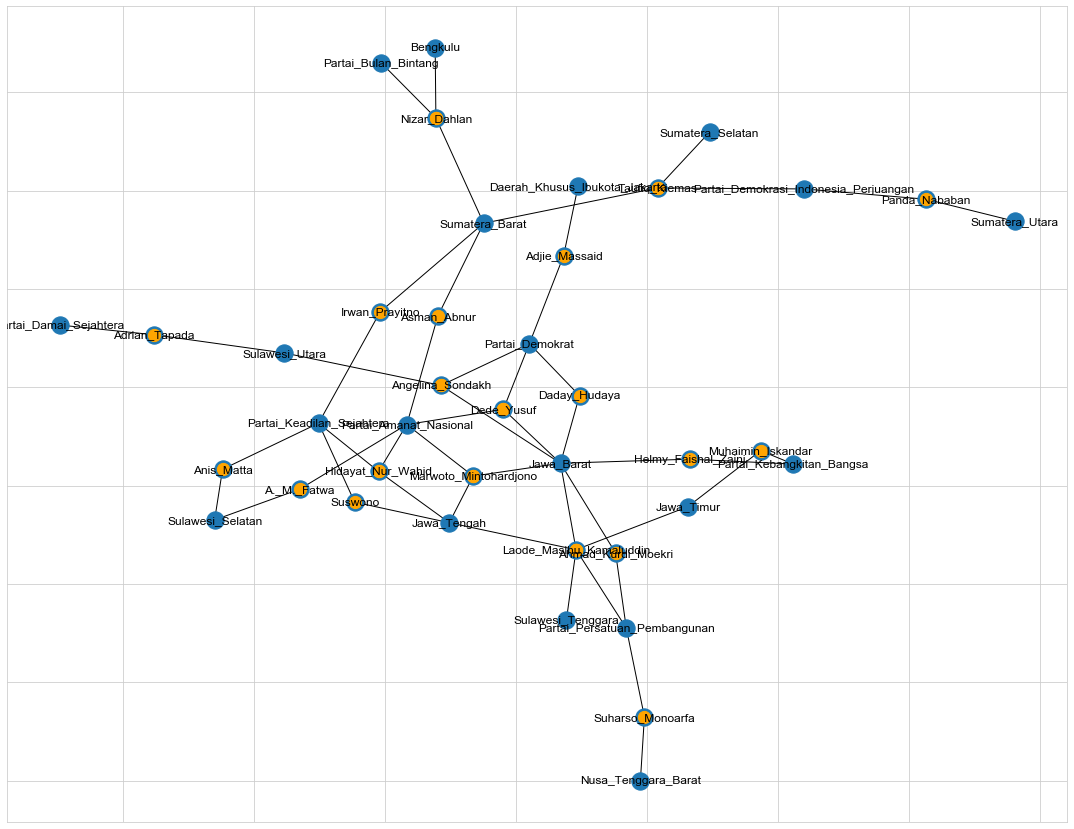

In [9]:
fig, ax = plt.subplots(figsize=(19,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels = True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
dprpopuler = [person for person in df.nama_dpr if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=dprpopuler, node_color='orange', node_size=150)

In [10]:
# Precompute probabilities and generate walks
node2vec = Node2Vec(g, dimensions=50, walk_length=16, num_walks=100, workers=4)

Computing transition probabilities: 100%|██████████| 40/40 [00:00<00:00, 7972.45it/s]


In [11]:
# EmbedQ
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [12]:
nodedpr = [x for x in df.nama_dpr]
#nodepartai = set(nodepartai)
nodedpr

['Anis_Matta',
 'Nizar_Dahlan',
 'Hidayat_Nur_Wahid',
 'Hidayat_Nur_Wahid',
 'Suswono',
 'Laode_Masihu_Kamaluddin',
 'Marwoto_Mintohardjono',
 'Laode_Masihu_Kamaluddin',
 'Muhaimin_Iskandar',
 'Adjie_Massaid',
 'Angelina_Sondakh',
 'Adrian_Tapada',
 'Panda_Nababan',
 'Taufiq_Kiemas',
 'Dede_Yusuf',
 'Dede_Yusuf',
 'Angelina_Sondakh',
 'Daday_Hudaya',
 'Ahmad_Kurdi_Moekri',
 'Laode_Masihu_Kamaluddin',
 'Marwoto_Mintohardjono',
 'Helmy_Faishal_Zaini',
 'Suharso_Monoarfa',
 'Taufiq_Kiemas',
 'Irwan_Prayitno',
 'Asman_Abnur',
 'Nizar_Dahlan',
 'A._M._Fatwa',
 'Laode_Masihu_Kamaluddin']

In [13]:
nodepartai = [x for x in df.nama_partai]
#nodepartai = set(nodepartai)
nodepartai

['Partai_Keadilan_Sejahtera',
 'Partai_Bulan_Bintang',
 'Partai_Amanat_Nasional',
 'Partai_Keadilan_Sejahtera',
 'Partai_Keadilan_Sejahtera',
 'Partai_Persatuan_Pembangunan',
 'Partai_Amanat_Nasional',
 'Partai_Persatuan_Pembangunan',
 'Partai_Kebangkitan_Bangsa',
 'Partai_Demokrat',
 'Partai_Demokrat',
 'Partai_Damai_Sejahtera',
 'Partai_Demokrasi_Indonesia_Perjuangan',
 'Partai_Demokrasi_Indonesia_Perjuangan',
 'Partai_Demokrat',
 'Partai_Amanat_Nasional',
 'Partai_Demokrat',
 'Partai_Demokrat',
 'Partai_Persatuan_Pembangunan',
 'Partai_Persatuan_Pembangunan',
 'Partai_Amanat_Nasional',
 'Partai_Kebangkitan_Bangsa',
 'Partai_Persatuan_Pembangunan',
 'Partai_Demokrasi_Indonesia_Perjuangan',
 'Partai_Keadilan_Sejahtera',
 'Partai_Amanat_Nasional',
 'Partai_Bulan_Bintang',
 'Partai_Amanat_Nasional',
 'Partai_Persatuan_Pembangunan']

In [14]:
embeddings = np.array([model.wv[x] for x in nodedpr])
embeddings

array([[-0.44791964,  0.73719704,  0.8112969 , ..., -0.53506094,
        -0.25749582, -0.2972187 ],
       [-0.509779  ,  0.20852785,  0.23525627, ..., -0.59540254,
        -0.23772259, -0.6844084 ],
       [-0.5800277 ,  0.5716627 ,  0.20584804, ..., -0.5016153 ,
        -0.19657817, -0.47859958],
       ...,
       [-0.509779  ,  0.20852785,  0.23525627, ..., -0.59540254,
        -0.23772259, -0.6844084 ],
       [-0.33633643,  0.8038936 ,  0.68209547, ..., -0.44160044,
        -0.1906268 , -0.04853857],
       [-0.73946553,  0.77723914, -0.4770594 , ..., -0.25065142,
        -0.8026476 , -0.5711908 ]], dtype=float32)

In [15]:
df.nama_partai

0                 Partai_Keadilan_Sejahtera
1                      Partai_Bulan_Bintang
2                    Partai_Amanat_Nasional
3                 Partai_Keadilan_Sejahtera
4                 Partai_Keadilan_Sejahtera
5              Partai_Persatuan_Pembangunan
6                    Partai_Amanat_Nasional
7              Partai_Persatuan_Pembangunan
8                 Partai_Kebangkitan_Bangsa
9                           Partai_Demokrat
10                          Partai_Demokrat
11                   Partai_Damai_Sejahtera
12    Partai_Demokrasi_Indonesia_Perjuangan
13    Partai_Demokrasi_Indonesia_Perjuangan
14                          Partai_Demokrat
15                   Partai_Amanat_Nasional
16                          Partai_Demokrat
17                          Partai_Demokrat
18             Partai_Persatuan_Pembangunan
19             Partai_Persatuan_Pembangunan
20                   Partai_Amanat_Nasional
21                Partai_Kebangkitan_Bangsa
22             Partai_Persatuan_

In [16]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [17]:
warna_partai = {
    'Partai_Amanat_Nasional':'lightsalmon',
    'Partai_Bulan_Bintang':'palegreen',
    'Partai_Damai_Sejahtera':'red',
    'Partai_Demokrasi_Indonesia_Perjuangan':'darkviolet',
    'Partai_Demokrat':'pink',
    'Partai_Keadilan_Sejahtera':'yellow',
    'Partai_Kebangkitan_Bangsa':'darkcyan',
    'Partai_Persatuan_Pembangunan':'steelblue'}

df['color'] = df['nama_partai'].apply(lambda x: warna_partai[x])
warna_dpr=dict(zip(df['nama_dpr'],df['color']))
colors = [warna_partai[x] for x in df.nama_partai]

In [18]:
used = set()
#uniq = ['PARTAI_KEADILAN_SEJAHTERA']
uniq = [x for x in nodedpr if x not in used and (used.add(x) or True)]
uniq

['Anis_Matta',
 'Nizar_Dahlan',
 'Hidayat_Nur_Wahid',
 'Suswono',
 'Laode_Masihu_Kamaluddin',
 'Marwoto_Mintohardjono',
 'Muhaimin_Iskandar',
 'Adjie_Massaid',
 'Angelina_Sondakh',
 'Adrian_Tapada',
 'Panda_Nababan',
 'Taufiq_Kiemas',
 'Dede_Yusuf',
 'Daday_Hudaya',
 'Ahmad_Kurdi_Moekri',
 'Helmy_Faishal_Zaini',
 'Suharso_Monoarfa',
 'Irwan_Prayitno',
 'Asman_Abnur',
 'A._M._Fatwa']

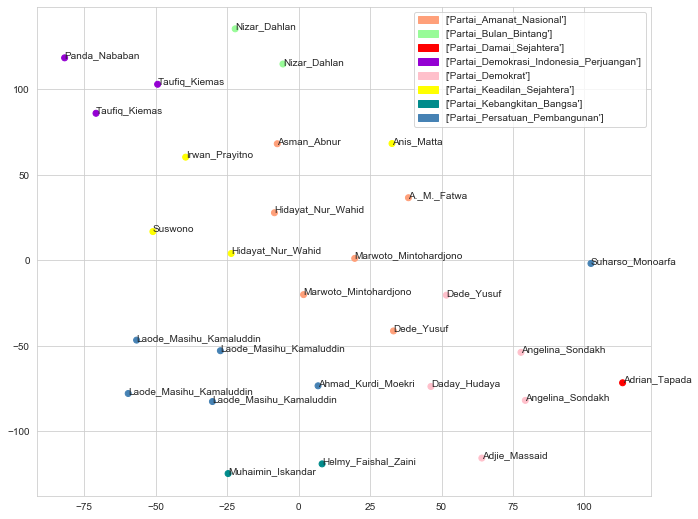

In [19]:
figure = plt.figure(figsize=(11,9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=colors)

i = 0
for partaiku in nodedpr:
    ax.annotate(partaiku, (embeddings_2d[i,0], embeddings_2d[i, 1]))
    i=i+1
    

dpr_legend=[mpatches.Patch(color=color, label=df.nama_dpr.unique()) for df.nama_dpr, color in warna_partai.items()]
ax.legend(handles=dpr_legend);

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.0627322454814216,
 1.0967641904810996,
 -1.1021007352810026,
 1.0429381046243789)

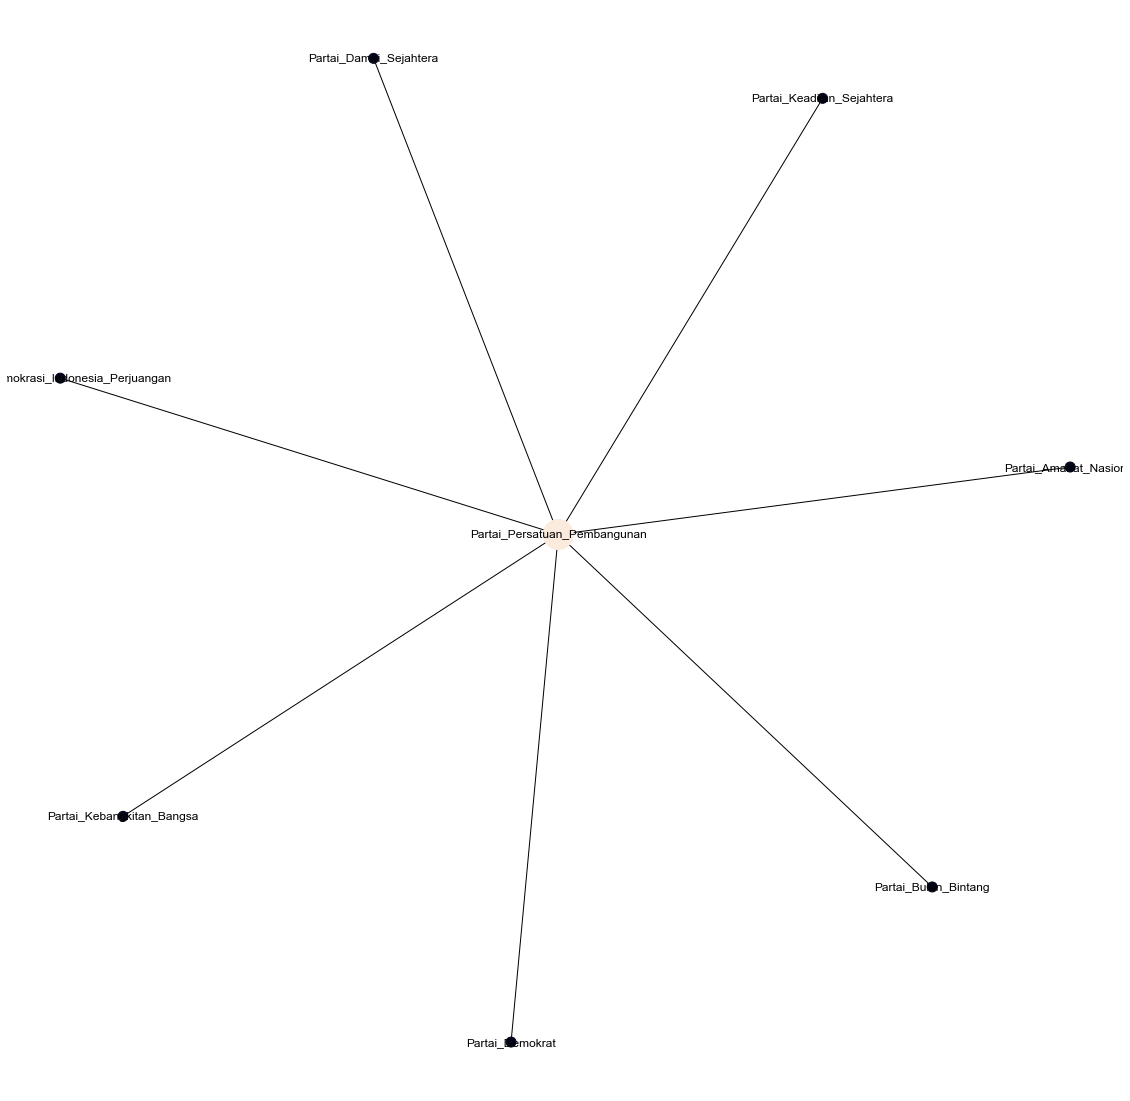

In [28]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,node_color=node_color,node_size=node_size )
plt.axis('off')